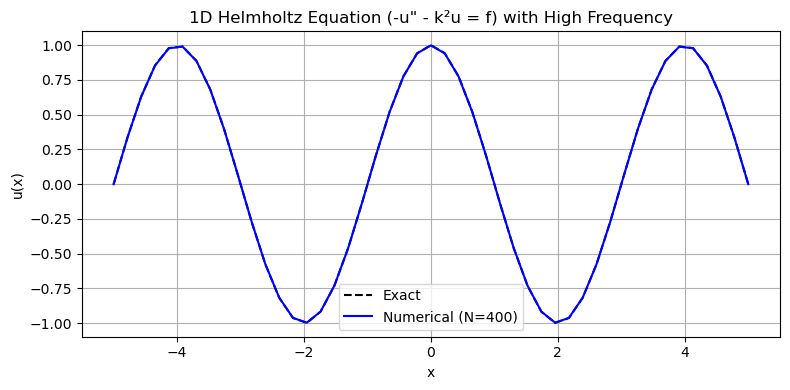

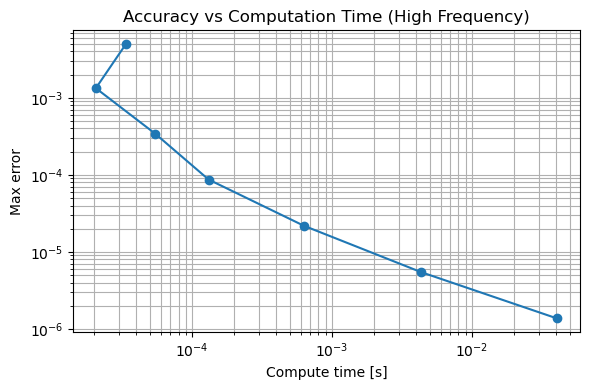

 N    h        max error     rate      time (s)
  20  0.47619   4.972e-03     -       3.3617e-05
  40  0.24390   1.330e-03   1.90   2.0504e-05
  80  0.12346   3.426e-04   1.96   5.4359e-05
 160  0.06211   8.682e-05   1.98   1.3113e-04
 320  0.03115   2.185e-05   1.99   6.2871e-04
 640  0.01560   5.480e-06   2.00   4.3137e-03
1280  0.00781   1.372e-06   2.00   4.0488e-02


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

def solve_helmholtz_1d(k, N):
    """
    Solve -u'' - k^2 u = f on [-5,5], u(-5)=u(5)=0 using N interior points.
    Returns numerical solution, exact solution, and compute time.
    """
    a, b = -5.0, 5.0
    h = (b - a) / (N + 1)
    x_interior = np.linspace(a + h, b - h, N)
    
    # Analytical solution with higher frequency
    u_exact = np.sin(5 * np.pi * (x_interior - a) / (b - a))
    f = ((5 * np.pi / (b - a))**2 - k**2) * np.sin(5 * np.pi * (x_interior - a) / (b - a))
    
    # Build tridiagonal matrix
    main_diag = (2.0 / h**2 - k**2) * np.ones(N)
    off_diag = (-1.0 / h**2) * np.ones(N - 1)
    A = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    
    # Solve linear system and measure time
    start = time.time()
    u_num = np.linalg.solve(A, f)
    elapsed = time.time() - start
    
    # Add boundaries
    x_full = np.concatenate(([a], x_interior, [b]))
    u_full = np.concatenate(([0.0], u_num, [0.0]))
    u_exact_full = np.sin(5 * np.pi * (x_full - a) / (b - a))
    
    return x_full, u_full, u_exact_full, h, elapsed

# Parameters
k = 5.0  # Higher wave number
Ns = [20, 40, 80, 160, 320, 640, 1280]
errors, times, hs = [], [], []

for N in Ns:
    x, u_num, u_exact, h, t = solve_helmholtz_1d(k, N)
    err = np.max(np.abs(u_num - u_exact))
    errors.append(err)
    times.append(t)
    hs.append(h)

# Plot numerical vs analytical for one grid
x, u_num, u_exact, _, _ = solve_helmholtz_1d(k, 45)
plt.figure(figsize=(8,4))
plt.plot(x, u_exact, 'k--', label='Exact')
plt.plot(x, u_num, 'b-', label='Numerical (N=400)')
plt.xlabel('x'); plt.ylabel('u(x)')
plt.title('1D Helmholtz Equation (-u\" - k²u = f) with High Frequency')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


# Compute time vs error
plt.figure(figsize=(6,4))
plt.loglog(times, errors, 'o-')
plt.xlabel('Compute time [s]')
plt.ylabel('Max error')
plt.title('Accuracy vs Computation Time (High Frequency)')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

# Print convergence table
print(" N    h        max error     rate      time (s)")
for i in range(len(Ns)):
    if i == 0:
        print(f"{Ns[i]:4d}  {hs[i]:.5f}   {errors[i]:.3e}     -       {times[i]:.4e}")
    else:
        rate = np.log(errors[i-1]/errors[i]) / np.log(2)
        print(f"{Ns[i]:4d}  {hs[i]:.5f}   {errors[i]:.3e}   {rate:.2f}   {times[i]:.4e}")
